# Quantum machine learning introduction
An introduction to QML by Pennylane @ `Womanium 2023`


## Pennylane intro

In [ ]:
# Imports
import pennylane as qml
from pennylane import numpy as np

In [ ]:
# Declare device
dev = qml.device('lightning.qubit', wires = 2)

In [ ]:
# Whatever I do bellow, run it on the device dev
@qml.qnode(dev)
def circuit():
  qml.Hadamard(wires = 0)
  qml.CNOT(wires = [0, 1])
  return qml.probs()

(<Figure size 500x300 with 1 Axes>, <Axes: >)

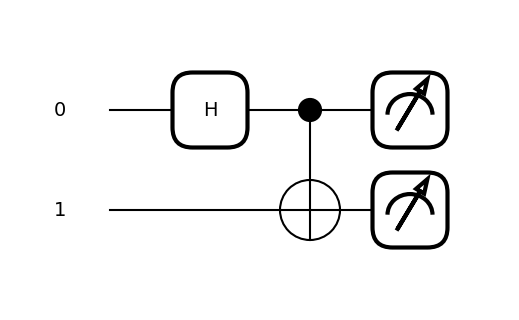

In [ ]:
# Draw circuit
qml.draw_mpl(circuit)()

In [ ]:
# Run circuit
circuit()

tensor([0.5, 0. , 0. , 0.5], requires_grad=True)

### Parametrized circuit with 1 qubit

In [ ]:
# Create a device with 1 qubit
dev2 = qml.device('default.qubit', wires = 1)

In [ ]:
# Create parametrized circuit
@qml.qnode(dev2)
def circuit2(params):
  qml.RX(params[0], wires = 0)
  qml.RY(params[1], wires = 0)
  return qml.expval(qml.PauliZ(0))

(<Figure size 500x200 with 1 Axes>, <Axes: >)

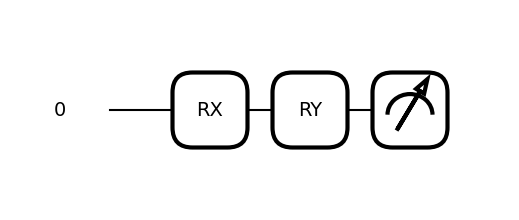

In [ ]:
# Draw
qml.draw_mpl(circuit2)([0.1, 0.2])

In [ ]:
circuit2([0.5, 0.2])

tensor(0.86008934, requires_grad=True)

### Create an optimization routine

In [ ]:
# Create a classical cost fx
def cost(params):
  return np.abs(circuit2(params)) ** 2

In [ ]:
# Choose an optimizer
opt = qml.GradientDescentOptimizer(stepsize = 0.3)

In [ ]:
# Make an initial guess for the params and set as trainable
params = np.array([1, 2], requires_grad = True)

In [ ]:
# Iterate over steps
for it in range(10):
  params = opt.step(cost, params)
  print(f'{it}-------')
  print(f'Params: {params}')
  print(f'Cost: {cost(params)}')

0-------
Params: [1. 2.]
Cost: 0.05055531691021436
1-------
Params: [1.04724114 1.93372077]
Cost: 0.031503213881533536
2-------
Params: [1.07998354 1.88394549]
Cost: 0.021083064730380734
3-------
Params: [1.1036532  1.84487907]
Cost: 0.014857201131578953
4-------
Params: [1.12132712 1.8131734 ]
Cost: 0.010874680803725773
5-------
Params: [1.13485283 1.78678256]
Cost: 0.008189553359878332
6-------
Params: [1.14540107 1.76438722]
Cost: 0.00630327505899032
7-------
Params: [1.15374868 1.74509602]
Cost: 0.00493441583742822
8-------
Params: [1.16043132 1.72828241]
Cost: 0.003914848551777359
9-------
Params: [1.1658303 1.7134909]
Cost: 0.0031392809935131077


## QML demo

In [ ]:
# Imports
import pennylane as qml
from pennylane import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Get data ready
X = np.linspace(0, 2 * np.pi, 10)

X.requires_grad = False

X_test = np.linspace(0 + 0.2, 2 * np.pi + 0.2, 10)

In [ ]:
# Create device
dev3 = qml.device('lightning.qubit', wires = 1)

In [ ]:
# Create q circuit
@qml.qnode(dev3)
def circuit3(params, x):
  qml.RX(x, wires = 0)
  qml.Rot(params[0], params[1], params[2], wires = 0)
  return qml.expval(qml.PauliZ(0))

In [ ]:
circuit3([0.1, 0.2, 0.3], 0)

array(0.98006658)

(<Figure size 500x200 with 1 Axes>, <Axes: >)

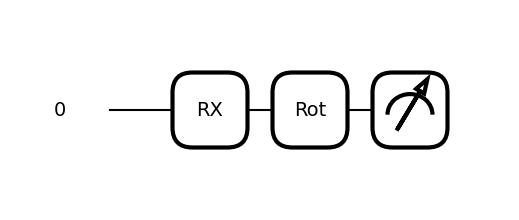

In [ ]:
qml.draw_mpl(circuit3)([0.1, 0.2, 0.3], 0)

In [ ]:
# Classical pre/post processing
def loss(Y, predictions):
  total_loss = 0

  for y, p in zip(Y, predictions):
    total_loss += (y - p) ** 2

  return total_loss

In [ ]:
# Define cost function
def cost(params, X):
  predictions = [circuit3(params, x) for x in X]
  Y = np.sin(X)
  return loss(Y, predictions)

In [ ]:
# Training circuit part :P

# Choose optimizer
opt = qml.GradientDescentOptimizer(stepsize = 0.1)

# Initial Guess
params = np.array([0.1, 0.2, 0.3], requires_grad = True)

# Iterate
for i in range(100):
  [params, _] = opt.step(cost, params, X)
  c = cost(params, X)
  print(f'{i}---------------')
  print(f'Params: {params}')
  print(f'Cost: {c}')

0---------------
Params: [-0.08143775  0.32437448  0.3       ]
Cost: 9.210994210887472
1---------------
Params: [-0.35991913  0.72427475  0.3       ]
Cost: 5.730129927152105
2---------------
Params: [-0.7877965   1.45217779  0.3       ]
Cost: 0.47177653517405505
3---------------
Params: [-0.97451043  1.60379687  0.3       ]
Cost: 0.1407045363865695
4---------------
Params: [-1.06191162  1.56327134  0.3       ]
Cost: 0.07259083788339024
5---------------
Params: [-1.11748179  1.57229807  0.3       ]
Cost: 0.04591741813102443
6---------------
Params: [-1.15729141  1.57052343  0.3       ]
Cost: 0.03196590917631005
7---------------
Params: [-1.18777106  1.57084257  0.3       ]
Cost: 0.02362818342857728
8---------------
Params: [-1.21214396  1.57078891  0.3       ]
Cost: 0.018219089901185374
9---------------
Params: [-1.23224518  1.57079747  0.3       ]
Cost: 0.014499249015392164
10---------------
Params: [-1.24921218  1.57079616  0.3       ]
Cost: 0.011826032286632007
11---------------
Para

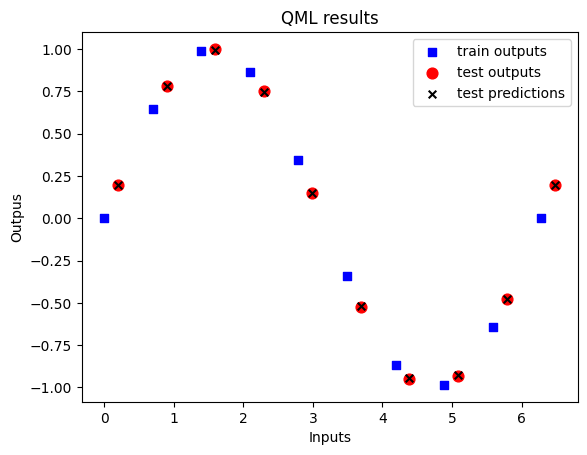

In [ ]:
test_predictions = []
for x_test in X_test:
    prediction = circuit3(params, x_test)
    test_predictions.append(prediction)

fig = plt.figure()
ax1 = fig.add_subplot(111)

ax1.scatter(X, np.sin(X), s=30, c='b', marker="s", label="train outputs")
ax1.scatter(X_test, np.sin(X_test), s=60, c='r', marker="o", label="test outputs")
ax1.scatter(X_test, test_predictions, s=30, c='k', marker="x", label="test predictions")

plt.xlabel('Inputs')
plt.ylabel('Outpus')
plt.title('QML results')

plt.legend(loc='upper right')
plt.show()